In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from chart_studio.plotly import plot, iplot
import cufflinks as cf
cf.go_offline(connected=True)

In [12]:
return_df = pd.read_csv('../data/kospi/preprocessed/df_return.csv',index_col=0)*100 #%단위로 환산
jaccard_df = pd.read_csv('../data/similarity/jaccard_df.csv',index_col=0)
cosine_df = pd.read_csv('../data/similarity/cosine_df.csv',index_col=0)

lv2_jaccard = jaccard_df.copy().loc[return_df.index] #거래일에 맞춰서 인덱싱
lv2_cosine = cosine_df.copy().loc[return_df.index]

## Main table II 구성

Excess return, 3-factor alpha, 5-factor alpha 을 계산한 table II 를 만들고자 합니다.
유사도 기준으로 Q1~Q5까지 낮은순부터 높은 순대로 portfolio를 만들고 document가 filing된 시점부터 종목을 보유하여 3개월 동안의 수익률을 보겠습니다. 그룹을 sorting하는 데 있어서는 전체유사도 평균이 아닌 개별기업의 연속된 사업보고서 값을 선정하였습니다.

Quantile 1(Q1) refers to firms that have the least similarity between their document this year and
the one last year; hence this portfolio consists of the “big changers.” Quintile 5 (Q5) refers
to firms that have the most similarity in their documents across years, and hence this
portfolio represents the “little to no changers.

In [13]:
lv2_jaccard[lv2_jaccard.loc[:,'삼양홀딩스'] > 0]

,삼양홀딩스,유한양행,CJ대한통운,두산,대림산업,한국테크놀로지그룹,기아차,동아쏘시오홀딩스,SK하이닉스,영풍,...,현대백화점,한국금융지주,GS,하나금융지주,아모레퍼시픽,LF,후성,SK이노베이션,CJ제일제당,KB금융
20110331,0.482558,NaN,0.615385,0.579749,0.630503,0.203113,0.705706,NaN,0.596091,0.576200,...,0.873362,NaN,NaN,0.462889,0.577154,NaN,0.633452,0.574394,0.755193,0.716630
20120330,0.349498,0.691877,0.500778,0.484272,0.604478,0.650970,0.404380,0.446479,0.344828,0.372517,...,NaN,NaN,0.692913,0.649770,0.555950,0.895184,0.592593,0.425806,0.579278,0.710660
20130401,0.541254,NaN,NaN,NaN,0.714286,0.597826,0.536538,0.645907,NaN,0.525890,...,0.725910,NaN,NaN,0.643997,0.551537,NaN,0.533141,0.571237,0.730924,NaN
20140331,0.623506,0.576659,0.528402,0.468793,0.643312,0.898990,0.697959,0.668571,0.452794,0.510526,...,0.763092,0.471028,0.881773,0.776367,0.604414,0.650526,0.604839,0.543253,0.754881,0.737799
20150331,0.688259,0.782927,0.616085,0.589710,0.665848,0.924460,0.677355,0.529118,0.324324,0.812367,...,0.640756,0.772939,0.130774,0.678119,0.518400,0.923913,0.818681,0.672179,0.678571,0.724490
20160330,0.632207,0.574423,0.579921,0.591931,0.571914,0.933852,0.791111,0.674319,0.317259,0.782341,...,0.726695,0.566667,0.724882,0.677509,0.487842,0.785276,0.794721,0.652893,0.599624,0.781513
20170331,0.643299,0.816705,0.541444,0.597531,0.629448,0.604712,0.692469,0.867362,0.585882,0.680357,...,0.729977,0.629002,0.743371,0.703704,0.556535,NaN,0.890244,0.864389,0.637708,0.701692
20180402,0.540034,0.715789,0.599490,NaN,NaN,0.739583,0.646035,0.815789,0.321534,0.839187,...,0.652427,0.507442,0.578341,0.780149,0.638095,NaN,0.828804,0.739049,NaN,0.753463
20190401,0.690635,0.532609,0.727488,NaN,0.510638,0.625402,0.678700,0.738854,NaN,0.811252,...,0.758364,0.564672,0.671296,0.776720,0.543662,0.870103,0.857909,0.810392,0.677365,0.821839


In [14]:
return_df.head(10)

,삼양홀딩스,유한양행,CJ대한통운,두산,대림산업,한국테크놀로지그룹,기아차,동아쏘시오홀딩스,SK하이닉스,영풍,...,현대백화점,한국금융지주,GS,하나금융지주,아모레퍼시픽,LF,후성,SK이노베이션,CJ제일제당,KB금융
20100104,0.449157,-1.122864,-3.880071,-2.620941,2.524038,-1.758137,3.740648,3.891752,4.103672,0.000000,...,0.444444,2.238806,-0.147929,1.367781,0.856311,1.109350,-0.666489,-0.425532,0.729927,-0.502513
20100105,-0.558935,0.568162,-0.183486,-0.215587,-0.937866,-4.393390,-5.528846,-3.371371,-3.112033,-3.339192,...,-4.424779,1.021898,0.444444,1.649175,-2.865512,-3.918495,-0.644122,3.846154,6.280193,-1.178451
20100106,-0.784746,1.129200,3.676471,5.501953,2.011834,-0.623946,1.017812,-2.712609,5.139186,-2.363636,...,-2.314815,-0.867052,1.032448,0.000000,-6.011538,-0.815661,1.431659,0.411523,0.227273,-0.340716
20100107,-1.584085,-0.838313,0.354610,2.761419,-0.232019,-2.528424,-4.534005,0.796951,-0.610998,-0.372439,...,0.473934,-2.040816,1.021898,-1.327434,-2.208737,-0.822368,0.798935,-0.409836,-1.133787,-1.196581
20100108,-0.230257,-0.843997,1.766784,6.467385,1.046512,0.870474,2.110818,-0.790650,1.024590,-0.373832,...,-2.358491,6.696429,-0.433526,0.298954,-1.546563,0.995025,0.501982,0.823045,0.000000,0.173010
20100111,0.230788,-1.705193,3.125000,-1.402081,3.452244,-1.070072,-3.100775,-3.187805,-2.636917,-0.562852,...,0.000000,-0.697350,1.015965,6.706408,3.019766,-1.970443,4.258675,0.816327,-0.917431,2.072539
20100112,-0.230257,-2.023423,-1.683502,4.740063,4.449388,-0.218074,1.066667,0.000000,0.208333,-0.377358,...,1.932367,-1.123596,-2.011494,-0.139665,-1.406437,0.502513,-1.109430,0.000000,0.925926,-0.507614
20100113,-1.267115,-1.179911,-2.910959,-2.262775,-0.745474,-4.108751,0.263852,-3.291650,0.000000,-1.325758,...,-2.843602,-2.982955,1.466276,-0.139860,-0.237750,-1.500000,0.994391,-4.453441,-3.211009,-1.870748
20100114,-0.815877,-0.595512,2.116402,-0.926065,1.180258,-0.455830,0.526316,-1.276818,5.821206,0.000000,...,0.487805,2.342606,2.745665,-0.280112,-0.476633,1.522843,-1.363292,0.847458,3.791469,-0.519931
20100115,0.115570,0.898994,-0.172712,5.607162,-0.742312,-0.228959,0.000000,-0.431110,2.554028,-0.383877,...,-0.485437,-2.432046,5.485232,-0.842697,-2.635234,3.000000,0.998208,-0.420168,2.283105,-0.174216


In [45]:
jaccard_df.min()

삼양홀딩스      0.349498
유한양행       0.532609
CJ대한통운     0.466586
두산         0.468793
대림산업       0.505664
             ...   
LF         0.650526
후성         0.533141
SK이노베이션    0.425806
CJ제일제당     0.579278
KB금융       0.701692
Length: 113, dtype: float64

In [73]:
a = jaccard_df.min()
for idx,i in enumerate(a):
    if i == a.min():
        print(idx,i)
    

105 0.13077423552374756


In [74]:
b = jaccard_df.max()

In [81]:
for idx,i in enumerate(b):
    if i == b.max():
        print(idx,i)

80 1.0


In [82]:
jaccard_df.columns[80]

'한국단자'

In [91]:
jaccard_df.iloc[:,80]

0.3757575757575757

In [67]:
jaccard_df.columns[105]

'GS'

In [68]:
jaccard_df.columns[112]

'KB금융'

In [72]:
jaccard_df.iloc[:,105].max()

0.994475138121547

In [15]:
val_idx,val_col = np.where(np.isfinite(jaccard_df))
container = np.full(shape=len(val_idx),fill_value=np.nan)

In [16]:
def get_after_filing_return(df,windows=30) : #기업 columns와 rcp_index 토대로 누적수익률 (sim_type 상관없음)
    
    val_idx,val_col = np.where(np.isfinite(df)) 
    container = np.full(shape=(len(val_idx),windows),fill_value=np.nan)
    idx_ls = []
    for num,(idx,col) in enumerate(zip(val_idx,val_col)) : 
        tmp = return_df.iloc[idx:idx+windows,col].values
        if windows - len(tmp) > 0 : 
            tmp = np.array(tmp.tolist()+[np.nan]*(windows-len(tmp)))
        container[num] = tmp #한기업의 filing이후 window_size만큼의 수익률 저장
        
        tmp_idx = return_df.index[idx]
        tmp_col = return_df.columns[col]        
        idx_ls.append("{}_{}".format(tmp_col,tmp_idx))
    
    final_df = pd.DataFrame(data=container,index=idx_ls)     
    return final_df

In [17]:
get_after_filing_return(lv2_jaccard)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
LF_20110324,1.398601,-1.206897,-0.872600,2.816901,1.027397,0.338983,1.689189,0.166113,-1.824212,0.337838,...,1.837672,-0.150376,-3.162651,-0.466563,3.125000,0.606061,0.000000,3.765060,-2.177068,3.857567
S&T모티브_20110325,1.827243,0.326264,-1.463415,-1.320132,3.678930,-0.161290,-0.646204,-0.813008,-0.655738,-2.805281,...,-0.145985,2.923977,-6.107955,-3.630862,-3.139717,0.972447,-2.086677,-2.622951,-1.515152,-2.393162
LG디스플레이_20110328,0.143678,-2.152080,-1.319648,2.228826,3.052326,0.423131,3.370787,0.000000,0.543478,1.351351,...,1.112485,-2.689487,2.261307,-1.965602,-3.508772,2.727273,-0.379267,-2.157360,-0.518807,3.650587
고려제강_20110329,1.523691,0.000000,0.245032,-0.496505,-0.502821,1.257619,0.373362,0.493434,0.861157,2.318005,...,1.071102,1.063368,-4.194403,-2.069481,0.617943,-0.246417,0.991905,-0.613382,-2.339934,1.387973
유한양행_20110330,1.333629,-2.632155,0.000000,-0.338316,1.695708,0.333804,-0.332693,-0.999826,-1.347098,-2.048239,...,1.064494,-0.702744,1.413754,0.349755,-1.389187,1.408757,-2.431490,-2.491239,-2.919499,-0.375577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
후성_20190401,2.546917,0.522876,1.300390,-0.256739,0.386100,0.256410,1.150895,-0.252845,0.126743,1.012658,...,2.709677,0.753769,2.493766,1.703163,0.717703,-1.068884,-5.042017,-0.126422,-3.924051,-0.527009
SK이노베이션_20190401,1.114206,0.550964,0.821918,-0.271739,0.817439,0.270270,0.000000,-0.808625,0.815217,-0.269542,...,0.268097,-2.406417,0.273973,-1.639344,-1.666667,-0.564972,-3.977273,0.887574,-1.759531,-0.895522
CJ제일제당_20190401,0.464396,0.462250,0.000000,-0.306748,-0.769231,1.860465,0.152207,0.151976,-1.517451,0.616333,...,0.633914,-0.787402,-0.317460,-1.433121,0.807754,-0.480769,-1.449275,-1.960784,-0.500000,-3.350084
KB금융_20190401,5.137395,2.272727,0.555556,0.331492,-0.220264,-0.662252,-0.444444,0.892857,0.000000,0.553097,...,2.312775,-0.538213,1.082251,-0.214133,0.000000,0.429185,-1.495726,0.542299,-0.323625,-0.108225


In [8]:
def get_return_per_sim(df,window):
    
    sim_df = df.copy()
    df_ = get_after_filing_return(sim_df,windows=window)
    
    index_ls = []
    value_ls = []
    for i in sim_df.columns:
        for j in sim_df.index:
            if sim_df.loc[j,i] > 0:
                value_ls.append(sim_df.loc[j,i])
                index_ls.append(i + '_'+str(j))
            
    unit_df = pd.DataFrame([index_ls,value_ls] , index = ['title','similarity']).T
    unit_df = unit_df.sort_values(by = 'similarity', ascending =True).reset_index(drop = True)

    sorted_values = [] #idx별 유사도값
    for i in df_.index:
        for idx,j in enumerate(unit_df.title): 
            if i == j:
                sorted_values.append(unit_df['similarity'][idx])
    
    df_ = df_.cumsum(1).iloc[:,-1].reset_index()
    df_.columns = ['corp_rcp','cum_return']
    df_['sim'] = sorted_values
    df_ = df_.sort_values(by = 'sim',ascending=True).reset_index(drop=True)
    
    return df_


In [9]:
def returns_per_date(df,*argv):
    ls_ = [get_return_per_sim(df,arg) for arg in argv]
    q_values=[]
    quarter = 5 #5분위
    for x in ls_:
        a = len(x) // quarter #200
        q = [x.cum_return[i*a:(i+1)*a].mean() for i in range(quarter)]
        q.append(q[-1]-q[0]) #long Q5 ,short Q1
        q_values.append(q)
    
    df = pd.DataFrame([k for k in q_values],index = [f'{arg} days' for arg in argv],
                      columns = [f'Q{i+1}'for i in range(len(q_values[0]))])
    df = df.rename(columns = {'Q6':'Q5-Q1'})
    df = df*100
    
    return df
    

In [43]:
return_jaccard = returns_per_date(lv2_jaccard,20,40,50,60,100,120)
return_cosine = returns_per_date(lv2_cosine,20,40,50,60,100,120)

Q1~Q5 을 net pooling similarity로 구성했을 때의 결과값이다. time-series effect와 cross-sectional effect가 모두 포함되어있기에 
극단적인 수치가 나온 결과..  잘나온것으로 보이지만.. calender time portpolio returns 는 이와 다르다.

In [44]:
return_jaccard

,Q1,Q2,Q3,Q4,Q5,Q5-Q1
20 days,0.955043,2.025042,2.932510,1.376949,3.760438,2.805395
40 days,-1.078367,0.808451,2.455538,1.189568,3.288017,4.366384
50 days,-2.096185,0.580430,2.629671,1.333369,2.998251,5.094436
60 days,-2.587654,-0.737557,1.657036,0.346921,1.345514,3.933168
100 days,-2.678137,-3.405412,-0.608029,-0.615576,0.079679,2.757816
120 days,0.560617,1.051665,2.018300,1.388277,2.605793,2.045176


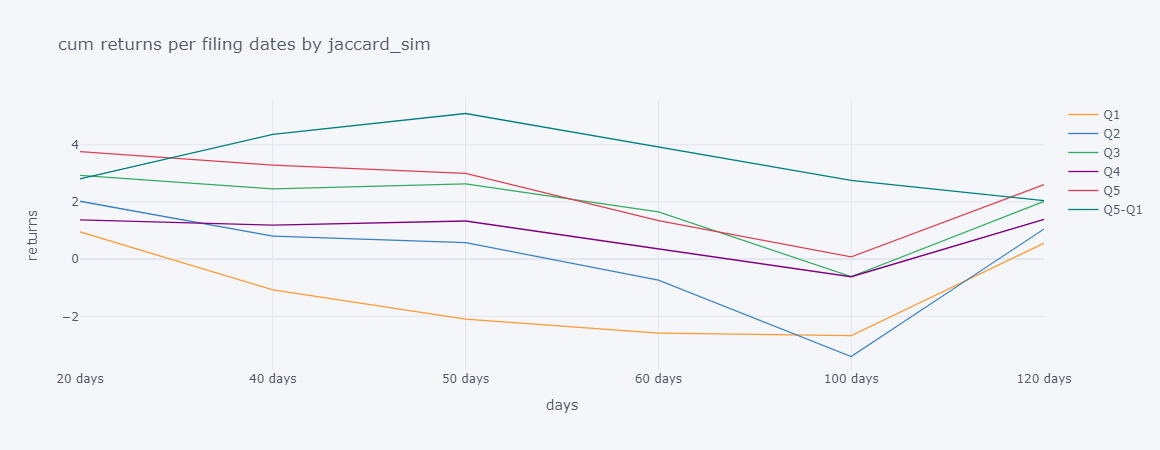

In [47]:
return_jaccard.iplot(kind='line',title = 'cum returns per filing dates by jaccard_sim ',xTitle = 'days',yTitle='returns')

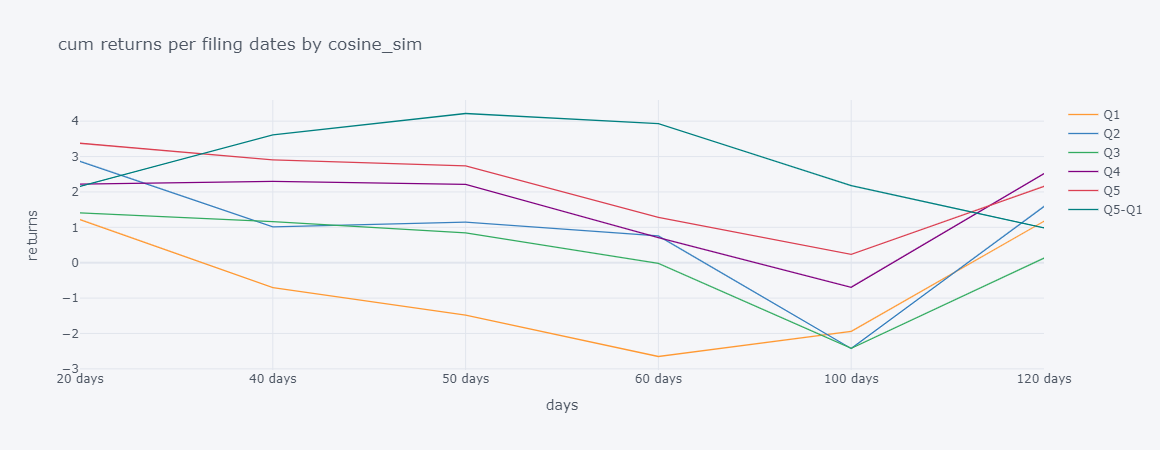

In [49]:
return_cosine.iplot(kind='line',title = 'cum returns per filing dates by cosine_sim',xTitle = 'days',yTitle='returns')

In [50]:
return_jaccard_after = returns_per_date(lv2_jaccard,120,140,160,180,200)
return_cosine_after = returns_per_date(lv2_cosine,120,140,160,180,200)

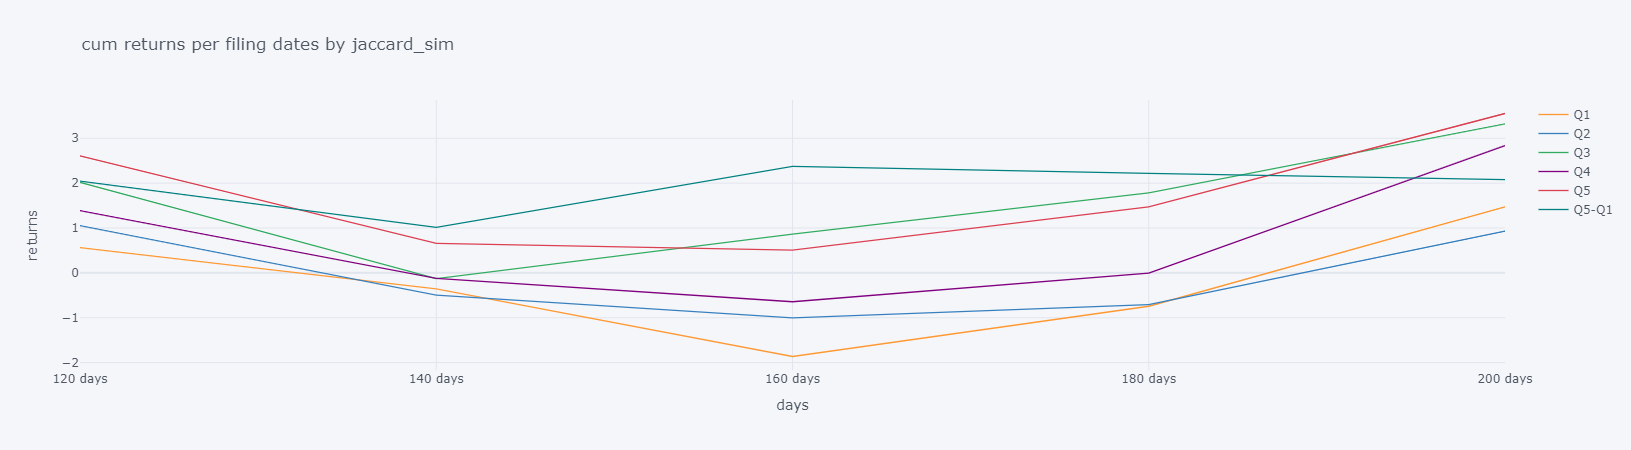

In [51]:
return_jaccard_after.iplot(kind='line',title = 'cum returns per filing dates by jaccard_sim',xTitle = 'days',yTitle='returns')

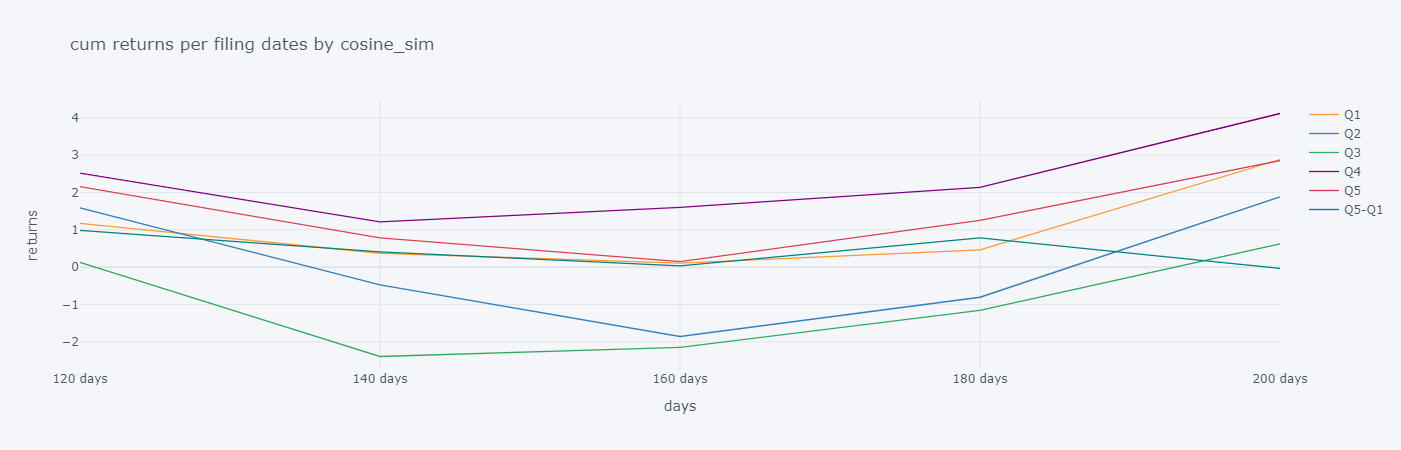

In [52]:
return_cosine_after.iplot(kind='line',title = 'cum returns per filing dates by cosine_sim',xTitle = 'days',yTitle='returns')